In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from GPyOpt.methods import BayesianOptimization
import pickle
import matplotlib
%matplotlib notebook
iteration_numbers = [1, 5, 10, 25]
domain = [{"name": "var_1", "type": "continuous", "domain": (0.0, 1.0)}]
# Store the instances at the iter for all the recon !
f_loss = lambda x: x + 0.0

bay_opt_container = {}
for i in iteration_numbers:
    temp_myBopt = BayesianOptimization(
        f=f_loss,
        domain=domain,
        model_type="GP",
        acquisition_type="EI",
        acquisition_weight=1,
    )

    temp_myBopt.__dict__.update(
        pickle.load(open("./model_checkpoints/Bayopt" + str(i), "rb"))
    )
    temp_myBopt._compute_results()
    bay_opt_container[str(i)] = temp_myBopt

In [14]:
# Plot the convergence based on gpyopt
def plot_acquisition(axis, model):
    bounds = model.acquisition.space.get_bounds()

    x_grid = np.arange(bounds[0][0], bounds[0][1], 0.001)
    x_grid = x_grid.reshape(len(x_grid), 1)
    acqu = model.acquisition.acquisition_function(x_grid)
    acqu_normalized = (-acqu - min(-acqu)) / (max(-acqu - min(-acqu)))
    m, v = model.model.predict(x_grid)
    factor = max(m + 1.96 * np.sqrt(v)) - min(m - 1.96 * np.sqrt(v))
    axis.plot(x_grid, m, color="#D5313E", lw=2.0)
    axis.plot(x_grid, m - 1.96 * np.sqrt(v), color="#445792")
    axis.plot(x_grid, m + 1.96 * np.sqrt(v), color="#445792")
    axis.fill_between(np.ravel(x_grid),
                     np.ravel(m - 1.96 * np.sqrt(v)), 
                     np.ravel(m + 1.96 * np.sqrt(v)),
                     color="#445792", alpha=0.5)
    y = model.Y - model.Y.mean()
    y = y/model.Y.std()
    axis.scatter(model.X[:-1], y[:-1], color="#9F383E", marker='o')


    axis.set_xlabel("Valve Setting")
    axis.set_ylabel("Objective")
    axis.set_ylim(
        min(m - 1.96 * np.sqrt(v)) - 0.25 * factor,
        max(m + 1.96 * np.sqrt(v)) + 0.05 * factor,
    )

<IPython.core.display.Javascript object>


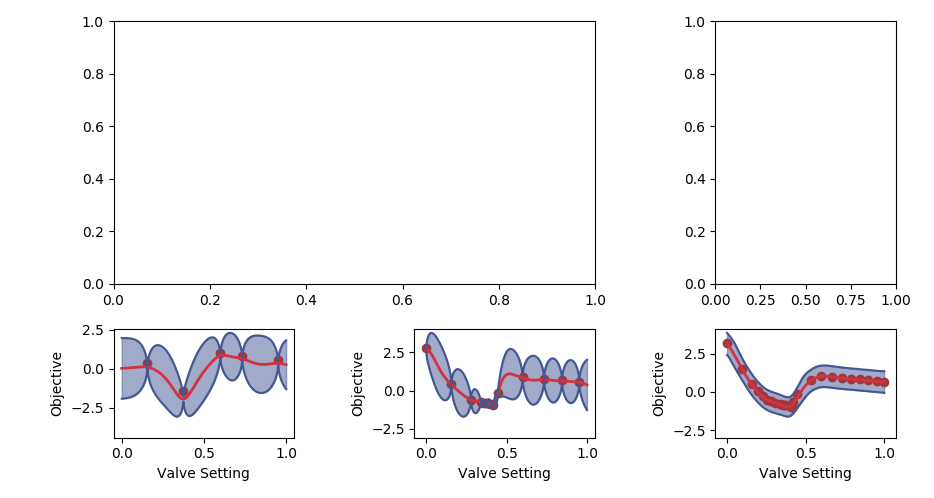

In [16]:
fig = plt.figure()
ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2, rowspan=2)
ax2 = plt.subplot2grid((3, 3), (0, 2), rowspan=2)
ax3 = plt.subplot2grid((3, 3), (2, 0))
ax4 = plt.subplot2grid((3, 3), (2, 1))
ax5 = plt.subplot2grid((3, 3), (2, 2))

#plot_acquisition(ax1, bay_opt_container[str(i)])
#plot_acquisition(ax2, bay_opt_container[str(i)])
plot_acquisition(ax3, bay_opt_container["1"])
plot_acquisition(ax4, bay_opt_container["10"])
plot_acquisition(ax5, bay_opt_container["25"])

plt.tight_layout()